In [1]:
## Thư viện
import matplotlib.pyplot   as plt
import numpy               as np
import pandas              as pd
import seaborn             as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.decomposition import PCA

In [ ]:
# Câu 1. Giảm chiều dữ liệu (2 điểm)
# Tập tin ‘Breast Cancer.csv’ chứa dữ liệu phân lớp bệnh nhân ung thư (Classification  {1, 2}) dựa trên các thuộc tính: Age, BMI, Glucose, Insulin, HOMA, Leptin, Adiponectin, Resistin và MCP.1.

In [ ]:
#1.1) Áp dụng phương pháp PCA để giảm xuống còn k chiều (k > 2) so với dữ liệu gốc. Giải thích nguyên nhân (hay cơ sở) của số chiều được giảm.

In [ ]:
cancer = pd.read_csv('Data/Breast-Cancer.csv')
cancer

In [2]:
cancer = pd.read_csv('../Data/Breast-Cancer.csv')
cancer

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2


In [5]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


In [6]:
cancer.describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000,1.551724
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663,0.499475
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,1.000000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474283,6.881763,269.978250,1.000000
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500,2.000000
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000,2.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,2.000000


In [3]:
target = 'Classification'
print('* Biến phân lớp:', target)

## Danh sách các features
nb_features = cancer.shape[1] - 1
features    = cancer.columns[:nb_features]
print('* Số lượng features = %2d' %nb_features)
print('  Các features:', ', '.join(features), '\n')

* Biến phân lớp: Classification
* Số lượng features =  9
  Các features: Age, BMI, Glucose, Insulin, HOMA, Leptin, Adiponectin, Resistin, MCP.1 



In [4]:
from sklearn.decomposition import PCA

## Loại bỏ cột Class trong dataframe
dataPCA = cancer.drop(columns = ['Classification'])
dataPCA

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920
...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460


In [5]:
pca = PCA().fit(dataPCA) # PCA().fit(): thực hiện PCA
pca

PCA()

In [14]:
pca.explained_variance_

array([1.19719265e+05, 6.30342361e+02, 2.97041969e+02, 2.37242281e+02,
       1.20569651e+02, 7.07813057e+01, 4.17147329e+01, 1.31306606e+01,
       6.71307085e-01])

In [12]:
## Phương sai trên từng chiều
print(pca.explained_variance_.flatten())

[1.19719265e+05 6.30342361e+02 2.97041969e+02 2.37242281e+02
 1.20569651e+02 7.07813057e+01 4.17147329e+01 1.31306606e+01
 6.71307085e-01]


[ 98.83473506  99.35511681  99.60034104  99.79619738  99.89573416
  99.95416796  99.98860573  99.9994458  100.        ]
[0 1 2 3 4 5 6 7 8 9]
[ 0.   98.83 99.35 99.6  99.79 99.89 99.95 99.98 99.99 99.99]


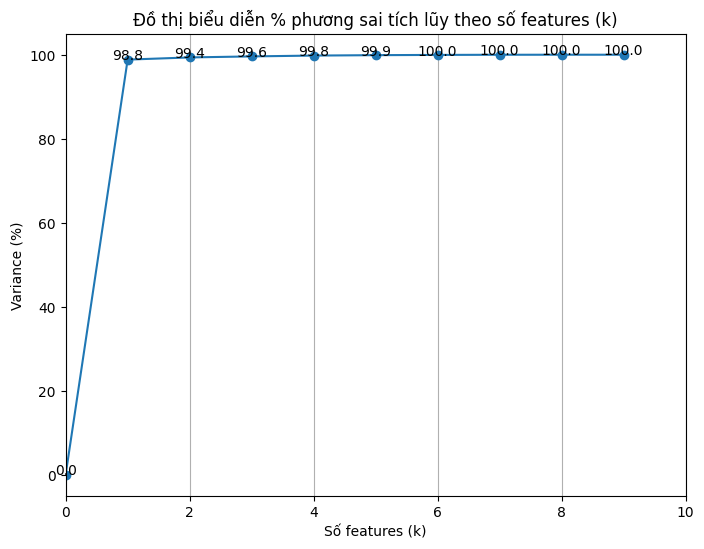

In [7]:
# Các điểm dữ liệu
points = np.cumsum(pca.explained_variance_ratio_) * 100
print(points)
points = np.insert(points, 0, 0) # Thêm điểm k = 0, variance = 0
x_i = np.arange(0, nb_features + 1)
print(x_i)
y_i = (points[-10:])//0.01/100
print(y_i)

plt.figure(figsize = (8, 6))
plt.plot(points, marker = 'o')
plt.xlabel('Số features (k)')
plt.ylabel('Variance (%)')
plt.title('Đồ thị biểu diễn % phương sai tích lũy theo số features (k)')
plt.xlim([0, nb_features + 1])
plt.grid(axis = 'x')
for i in x_i:
    plt.text(i, y_i[i], round(y_i[i], 1), ha = 'center', va = 'baseline')
    # tung độ của text cao hơn point 1 đơn vị

plt.show()

In [11]:
pca = PCA(n_components=6).fit(dataPCA) # PCA().fit(): thực hiện PCA
pca

PCA(n_components=6)

In [12]:
pca.explained_variance_
points = np.cumsum(pca.explained_variance_ratio_) * 100
points

array([98.83473506, 99.35511681, 99.60034104, 99.79619738, 99.89573416,
       99.95416796])

In [13]:
## Kiểm chứng: Tính phương sai tích lũy theo giá trị của k
var = 0.0
for k in range(1, nb_features + 1):
    pca = PCA(k)
    pca.fit(dataPCA)

    newVar = pca.explained_variance_ratio_.sum() * 100
    print('   * k = %2d' %k, ': phương sai tích lũy ~ %.1f%%' %newVar,
          '--> tăng ~ %.1f%%' %(newVar - var))
    var = newVar

   * k =  1 : phương sai tích lũy ~ 98.8% --> tăng ~ 98.8%
   * k =  2 : phương sai tích lũy ~ 99.4% --> tăng ~ 0.5%
   * k =  3 : phương sai tích lũy ~ 99.6% --> tăng ~ 0.2%
   * k =  4 : phương sai tích lũy ~ 99.8% --> tăng ~ 0.2%
   * k =  5 : phương sai tích lũy ~ 99.9% --> tăng ~ 0.1%
   * k =  6 : phương sai tích lũy ~ 100.0% --> tăng ~ 0.1%
   * k =  7 : phương sai tích lũy ~ 100.0% --> tăng ~ 0.0%
   * k =  8 : phương sai tích lũy ~ 100.0% --> tăng ~ 0.0%
   * k =  9 : phương sai tích lũy ~ 100.0% --> tăng ~ 0.0%
